## Linear regression

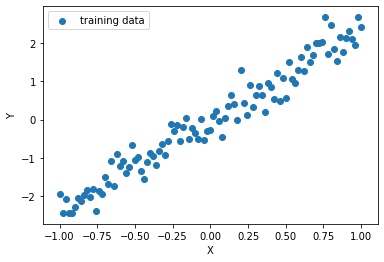

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

# generate some training data
x_train=np.linspace(-1,1,101)
y_train=2.3*x_train+np.random.randn(*x_train.shape)*0.3 # * is for unpacking

# plot training data
plt.scatter(x_train,y_train,label="training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [2]:
# parameters
training_epochs = 200
learning_rate = 0.01

In [3]:
# define model function
def linearReg(X,w):
    return tf.multiply(X,w)

In [4]:
# define placeholders, variables
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable(1.0, name="weight")

In [5]:
# define cost function
y_pred=linearReg(X,w)
cost=tf.reduce_mean(tf.pow(Y-y_pred,2))

In [6]:
# add summary to view on tensorboard (create the logs dir!)
weight_summary = tf.summary.scalar("weight summary", w)
writer = tf.summary.FileWriter("./logs")

In [7]:
# choose training op
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

W0731 12:05:41.602653 11892 deprecation.py:323] From G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    
    for _ in range(training_epochs):
        for x,y in zip(x_train, y_train):
            summary_str, meh = sess.run([weight_summary, trainer],feed_dict={X:x,Y:y})
            sess.run(w)
            writer.add_summary(summary_str, _)
    w_val=sess.run(w)
    y_model=sess.run(linearReg(x_train,sess.run(w)))
    writer.add_graph(sess.graph)
    writer.close()
    sess.close()


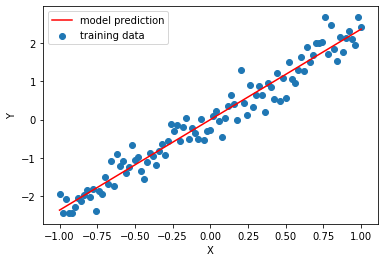

In [9]:
plt.scatter(x_train, y_train,label="training data")
plt.plot(x_train,y_model,'r',label="model prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()